In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import (
    GaussianNB,
    BernoulliNB,
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

In [2]:
data = load_breast_cancer()

In [3]:

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print(X.shape, y.shape)


(569, 30) (569,)


In [22]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

In [7]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [34]:
pipe_nb = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('naive_bayes', GaussianNB())
    ]
)

pipe_nb.fit(X_train, y_train)

,steps,"[('scaler', ...), ('naive_bayes', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,priors,None
,var_smoothing,1e-09


In [36]:
y_pred_nb = pipe_nb.predict(X_test)
y_prob_nb = pipe_nb.predict_proba(X_test)[:,1]

In [8]:
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:, 1]


### metrics

- Accuracy: TP + TN / (TP + TN + FP + FN)
- Precision: TP / (TP + FP)
- Recall (Sensitivity): TP / (TP + FN)
- F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

Where:
- TP (True Positives): The number of positive instances correctly classified as positive.
- TN (True Negatives): The number of negative instances correctly classified as negative.   
- FP (False Positives): The number of negative instances incorrectly classified as positive.
- FN (False Negatives): The number of positive instances incorrectly classified as negative.



In [38]:
print("-------------------- Logistic Regression -------------------")

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")

-------------------- Logistic Regression -------------------
accuracy: 0.9824561403508771
precision: 0.9861111111111112
recall: 0.9861111111111112
f1: 0.9861111111111112


In [39]:
print("-------------------- Gaussian Naive Bayes -------------------")

print(f"accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"precision: {precision_score(y_test, y_pred_nb)}")
print(f"recall: {recall_score(y_test, y_pred_nb)}")
print(f"f1: {f1_score(y_test, y_pred_nb)}")

-------------------- Gaussian Naive Bayes -------------------
accuracy: 0.9298245614035088
precision: 0.9444444444444444
recall: 0.9444444444444444
f1: 0.9444444444444444


### confusion matrix

In [10]:
confusion_matrix(y_test, y_pred)

array([[41,  1],
       [ 1, 71]])

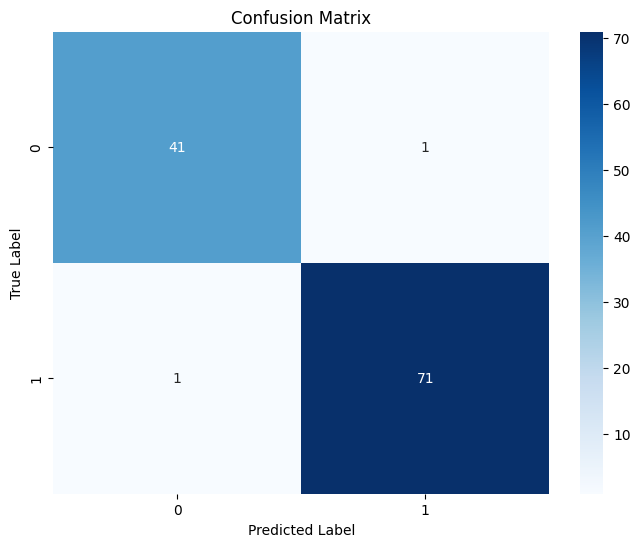

In [ ]:
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrixi for logistic regression')
plt.show()

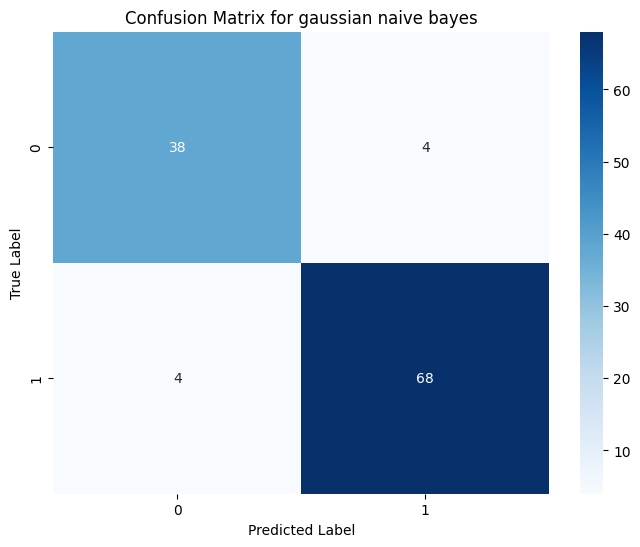

In [40]:
cm= confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for gaussian naive bayes')
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### ROC Curve and AUC

- An ROC (Receiver Operating Characteristic) curve is a graph that visualizes a binary classification model's performance by plotting the True Positive Rate (Sensitivity) against the False Positive Rate (1-Specificity) at various classification thresholds
- It shows the trade-off between correctly identifying positives and incorrectly flagging negatives. 
- It helps evaluate how well a model distinguishes between classes, with the Area Under the Curve (AUC) providing a single score (0 to 1) for overall accuracy
- where 1 is perfect and 0.5 is random guessing. 

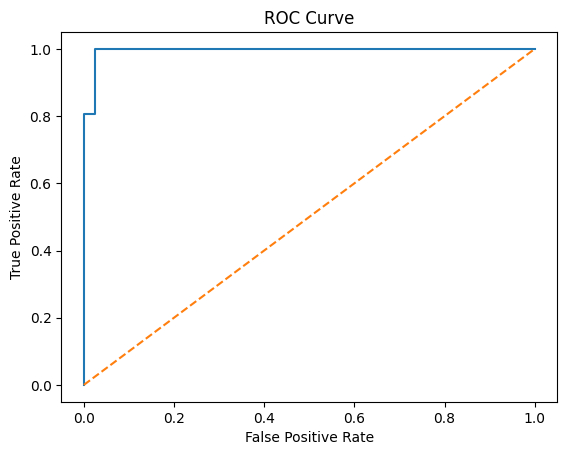

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


### ~feature impotance

In [18]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': pipe.named_steps['logreg'].coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

importance_df.head(10)

,Feature,Coefficient
21,worst texture,-1.255088
10,radius error,-1.082965
27,worst concave points,-0.953686
23,worst area,-0.947756
20,worst radius,-0.947616
28,worst symmetry,-0.939181
13,area error,-0.929104
26,worst concavity,-0.823151
22,worst perimeter,-0.763220
24,worst smoothness,-0.746625


<Axes: >

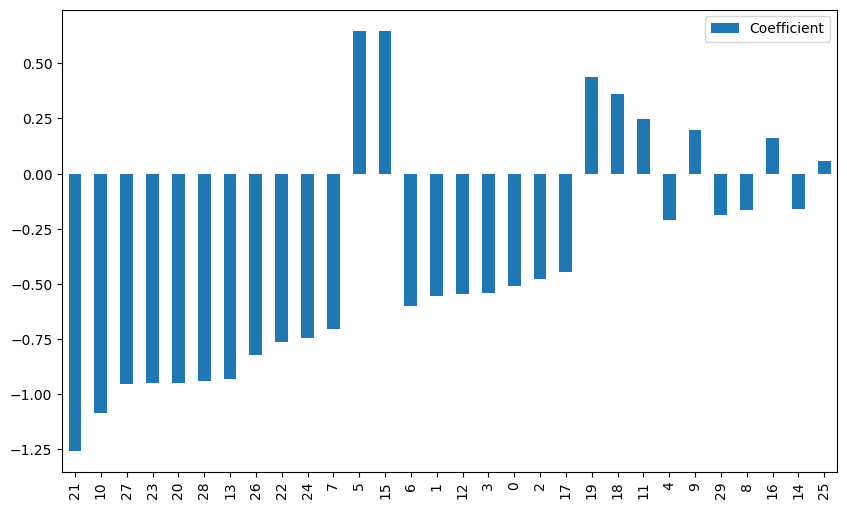

In [19]:
importance_df.plot(kind='bar', figsize=(10, 6))